<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/Recurrent%20Neural%20Network/GRU_From_Scratch_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
def get_params(input_nodes, hidden_unit, output_nodes):

    def normal(shape):
        return torch.randn(size=shape)*0.01

    def three():
        return (normal((input_nodes, hidden_unit)),
                normal((hidden_unit, hidden_unit)),
                torch.zeros(hidden_unit))

    W_xz, W_hz, b_z = three()  # Update door parameters
    W_xr, W_hr, b_r = three()  # Reset door parameters   
    W_xh, W_hh, b_h = three()  # Candidate hidden state parameters

    # Output layer parameters
    W_hq = normal((hidden_unit, output_nodes))
    b_q = torch.zeros(output_nodes, )
    
    # Additional gradient
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]

    return params

In [13]:
def gru(inputs, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params 
    # H, = state
    H = torch.randn((input_nodes, hidden_unit))*0.01
    outputs = []
    for X in inputs: 
        
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
    
    return H

In [14]:
N = 1500
t = np.arange(0,N)

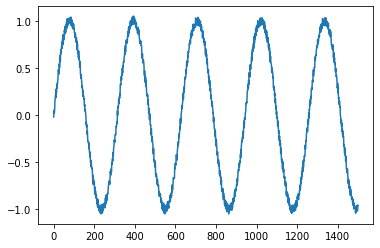

In [15]:
data_sin = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
plt.plot(data_sin)

In [16]:
def ConvertSignalToDataset(signal, step):
  X = []
  y = []
  for i in range(len(signal)-step):
    j = i + step
    X.append(signal[i:j])
    y.append(signal[j])

  return np.array(X), np.array(y)

In [17]:
seq_length = 20
X, y = ConvertSignalToDataset(data_sin, seq_length)
X = torch.Tensor(X)

In [18]:
input_nodes = 20
hidden_unit = 64
output_nodes = 1

In [19]:
params = get_params(input_nodes, hidden_unit, output_nodes)

In [20]:
GRU = gru(X, params)

In [30]:
output = torch.matmul(GRU[1], params[9]) + params[10]
output

tensor([-0.0025])